In [1]:
import pickle
from matplotlib import pyplot as plt
import numpy as np 
import scipy.stats
import os

#https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n - 1)
    return m, m - h, m + h

def set_dict_entry(dictionary, keys, value):
    for key in keys[:-1]:
        dictionary = dictionary.setdefault(key, {})
    dictionary[keys[-1]] = value
    
def dict_iterator(dictionary, keys=None):
    if keys is None:
        keys = []
    for key, value in dictionary.items():
        new_keys = keys + [key]
        if isinstance(value, dict):
            for pair in dict_iterator(value, keys=new_keys):
                yield pair
        else:
            yield [new_keys, value]
            
def get_CI(dictionary):
    to_return = {}
    for val in dict_iterator(dictionary):
        utilities = val[1]
        set_dict_entry(to_return, val[0], mean_confidence_interval(utilities))
    return to_return

In [2]:
dir = 'Results/'
results = {}
for file in os.scandir(dir):
    if file.name.endswith('.p'):
        tokens = file.name[:-2].split('_')
        if "very" in tokens:
            with open(os.path.join(dir, file.name), 'rb') as input_file:
                value = pickle.load(input_file)
            set_dict_entry(results, [tokens[0], "very_"+ tokens[-1]], value)
        else:
            with open(os.path.join(dir, file.name), 'rb') as input_file:
                value = pickle.load(input_file)
            set_dict_entry(results, [tokens[0], tokens[-1]], value)
print(results)

CI_dict = get_CI(results)

print(CI_dict)

{'gaggle': {'tiny': [1.082106351852417, 1.067810297012329, 1.0598809719085693, 1.0605478286743164, 1.0604338645935059, 1.0638337135314941, 1.0627760887145996, 1.062652826309204, 1.1197502613067627, 1.0673153400421143, 1.0668323040008545, 1.0632731914520264, 1.0620086193084717, 1.0655920505523682, 1.0644655227661133, 1.0592749118804932, 1.0608646869659424, 1.0654847621917725, 1.0621519088745117, 1.1241791248321533, 1.0644338130950928, 1.0600769519805908, 1.0653095245361328, 1.0597124099731445, 1.063643217086792, 1.0623831748962402, 1.0640363693237305, 1.065624475479126, 1.0617389678955078, 1.0682265758514404, 1.1255676746368408, 1.064143419265747, 1.0665550231933594, 1.0629146099090576, 1.065523386001587, 1.067413568496704, 1.0665960311889648, 1.063237190246582, 1.0675842761993408, 1.0643641948699951, 1.0661132335662842, 1.1245734691619873, 1.0659213066101074, 1.06646728515625, 1.0664823055267334, 1.0605714321136475, 1.0624768733978271, 1.0668213367462158, 1.0646147727966309, 1.06389546

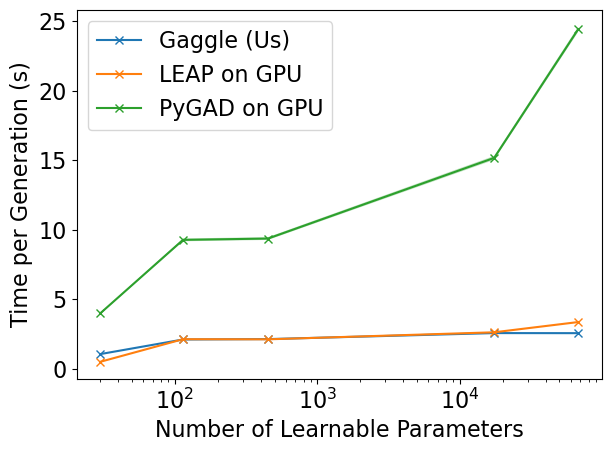

<Figure size 640x480 with 0 Axes>

In [3]:
model_sizes = ["tiny", "small", "medium", "large", "very_large"]
model_num_params = [30, 114, 450, 17410, 67590]
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams.update({'font.size': 16})

nice_names = {'gaggle':'Gaggle (Us)', 'leap': 'LEAP on GPU', 'pygad': 'PyGAD on GPU'}

for algorithm in nice_names:
    result = CI_dict[algorithm]
    values = [result[str(x)][0] for x in model_sizes]
    lower = [result[str(x)][1] for x in model_sizes]
    upper = [result[str(x)][2] for x in model_sizes]
    plt.semilogx(model_num_params, values, label=nice_names[algorithm], marker='x')
    plt.fill_between(model_num_params, lower, upper, alpha=0.3)
        
# plt.title("{} Dataset".format(dataset))
plt.xlabel("Number of Learnable Parameters")
plt.ylabel("Time per Generation (s)")
plt.tight_layout()
plt.legend()
plt.plot()
plt.savefig('Results/cartpole_plot.pdf', bbox_inches='tight')
plt.show()
plt.clf()